In [2]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Heart_Disease_Dataset.csv") 
print(df)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [4]:
shape = df.shape
print("shape of dataset is: " , shape)

shape of dataset is:  (1190, 12)


In [5]:
missings = df.isnull().values.any()
if not missings: x = "not"
print(f"this dataset has {x} missing value")

this dataset has not missing value


In [6]:
is_ballanced = np.abs(df['target'].count() - 2 * df['target'].sum()) < 100
print(f"ballanced: {is_ballanced}")

ballanced: True


--------------------- Plots --------------------------



Text(0.5, 1.0, 'gender distrbution for both normal and heart diseses patients')

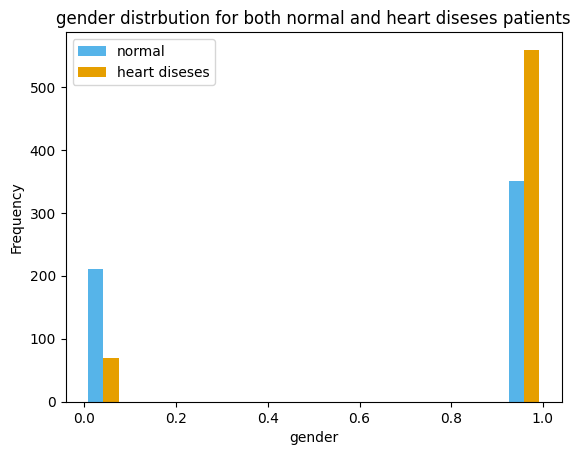

In [7]:
print("--------------------- Plots --------------------------\n")
# plot the gender distrbution for both normal and heart diseses patients
colors = ['#56B4E9', '#E69F00']
names = ['normal', 'heart diseses']
plt.hist([df[df.target == 0]['sex'], df[df.target == 1]['sex']], bins = int(180/15),color = colors, label=names)
plt.legend()
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('gender distrbution for both normal and heart diseses patients')

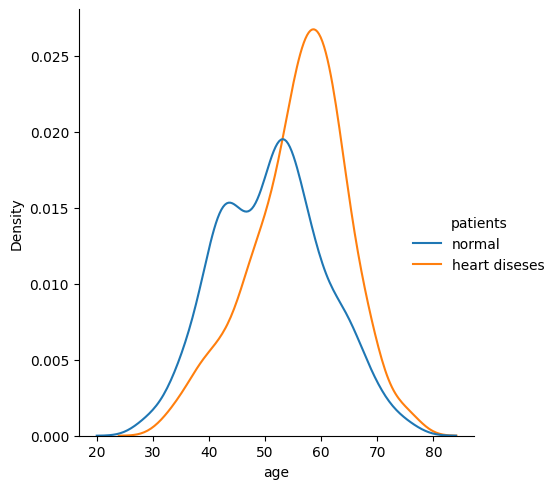

In [8]:
age_plot = sns.displot(df, x="age", hue="target", kind="kde")
age_plot._legend.set_title("patients")
age_plot.set_titles("age distrbution for both normal and heart diseses patients")
new_labels = ['normal', 'heart diseses']
for t, l in zip(age_plot._legend.texts, new_labels): t.set_text(l)

In [9]:
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
for columns in columns:
    df = df[np.abs(df[columns]-df[columns].mean()) <= (3*df[columns].std())]
print(df)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [10]:
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min())/(df[numerical_cols].max() - df[numerical_cols].min())
print(df[numerical_cols])

           age  resting bp s  cholesterol  max heart rate   oldpeak
0     0.244898      0.571429     0.588595        0.777778  0.295455
1     0.428571      0.761905     0.366599        0.659259  0.409091
2     0.183673      0.476190     0.576375        0.229630  0.295455
3     0.408163      0.552381     0.435845        0.303704  0.465909
4     0.530612      0.666667     0.397149        0.407407  0.295455
...        ...           ...          ...             ...       ...
1185  0.346939      0.285714     0.537678        0.481481  0.431818
1186  0.816327      0.609524     0.393075        0.548148  0.681818
1187  0.591837      0.476190     0.266802        0.355556  0.431818
1188  0.591837      0.476190     0.480652        0.792593  0.295455
1189  0.204082      0.552381     0.356415        0.785185  0.295455

[1173 rows x 5 columns]


In [11]:
minimum = df[numerical_cols].min()
maximum = df[numerical_cols].max()
print(minimum)
print(maximum)
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True)

age               0.0
resting bp s      0.0
cholesterol       0.0
max heart rate    0.0
oldpeak           0.0
dtype: float64
age               1.0
resting bp s      1.0
cholesterol       1.0
max heart rate    1.0
oldpeak           1.0
dtype: float64


In [12]:
print(df)

           age  sex  chest pain type  resting bp s  cholesterol  \
0     0.244898    1                2      0.571429     0.588595   
1     0.428571    0                3      0.761905     0.366599   
2     0.183673    1                2      0.476190     0.576375   
3     0.408163    0                4      0.552381     0.435845   
4     0.530612    1                3      0.666667     0.397149   
...        ...  ...              ...           ...          ...   
1185  0.346939    1                1      0.285714     0.537678   
1186  0.816327    1                4      0.609524     0.393075   
1187  0.591837    1                4      0.476190     0.266802   
1188  0.591837    0                2      0.476190     0.480652   
1189  0.204082    1                3      0.552381     0.356415   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        0.777778                0   
1                       0            0       

In [13]:
df = df.to_numpy()
print(df)

[[ 0.24489796  1.          2.         ...  0.29545455  1.
  -1.        ]
 [ 0.42857143  0.          3.         ...  0.40909091  2.
   1.        ]
 [ 0.18367347  1.          2.         ...  0.29545455  1.
  -1.        ]
 ...
 [ 0.59183673  1.          4.         ...  0.43181818  2.
   1.        ]
 [ 0.59183673  0.          2.         ...  0.29545455  2.
   1.        ]
 [ 0.20408163  1.          3.         ...  0.29545455  1.
  -1.        ]]


In [14]:
# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

In [15]:
# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

In [16]:
# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

In [17]:
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)

Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


In [18]:
def classification_report(y_true, y_pred):
    Accuracy = np.sum((y_true == y_pred)) / len(y_pred)
    Precision = np.sum(((y_pred == y_true) & (y_true == 1))) / np.sum((y_pred == 1))
    Recall = np.sum(((y_pred == y_true) & (y_true == 1))) / np.sum((y_true == 1))
    F1score = 2 * np.sum(((y_pred == y_true) & (y_true == 1))) / (np.sum(y_true == 1) + np.sum(y_pred == 1))
    return Accuracy, Precision, Recall, F1score

In [19]:
# linear kernel
# define model
model = SVC(kernel='linear', C=10)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))

results of sklearn svm linear kernel: (0.7869318181818182, 0.7792207792207793, 0.7453416149068323, 0.7619047619047619)


In [20]:
# polynomial kernel
# define model
model = SVC(kernel='poly', C=1000)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_pred))

results of sklearn svm polynomial kernel: (0.8295454545454546, 0.8258064516129032, 0.7950310559006211, 0.810126582278481)


In [21]:
# rbf kernel
# define model
model = SVC(kernel='rbf', gamma=10, C=100)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))

results of sklearn svm RBF kernel: (0.9261363636363636, 0.9245283018867925, 0.9130434782608695, 0.91875)


In [22]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

In [23]:
def linear_kernel(x, y):
    return x @ y

def polynomial_kernel(x, y, p = 3):
    return (1 + (x @ y)) ** p

def rbf_kernel(x, y, gamma = 10):
    return np.exp(-gamma*np.linalg.norm(x-y)**2)

In [24]:
class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape
        
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])
                
                
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            t1 = np.diag(np.ones(n_samples) * -1)
            t2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((t1, t2)))
            t1 = np.zeros(n_samples)
            t2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((t1, t2)))
            
        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
        # Intercept
        self.b = 0
        for n in range(len(self.alpha)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.alpha * self.sv_y * K[ind[n],sv])
        self.b /= len(self.alpha)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.alpha)):
                self.w += self.alpha[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
            
    def predict(self, X):
        if self.w is not None:
            return np.sign((X @ self.w) + self.b)
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s

            return np.sign(y_predict + self.b)


In [25]:
# linear kernel
model = MySVM(kernel=linear_kernel, C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("results of MySVM linear kernel:", classification_report(y_test , y_pred))
#print(X_test)

results of MySVM linear kernel: (0.7926136363636364, 0.7933333333333333, 0.7391304347826086, 0.7652733118971061)


In [26]:
# polynomial kernel
model = MySVM(kernel=polynomial_kernel, C=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred))

 

results of MySVM polynomial kernel: (0.8125, 0.802547770700637, 0.782608695652174, 0.7924528301886793)


In [27]:
# rbf kernel
model = MySVM(kernel=rbf_kernel, C=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred))

results of Mysvm RBF kernel: (0.9261363636363636, 0.9245283018867925, 0.9130434782608695, 0.91875)


In [28]:
# define model
model = SVC(kernel='rbf',gamma=18 , C=18)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm sigmoid kernel:", classification_report(y_test, y_pred))
print(X_test)
print(model.classes_)
print(y_pred)
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

results of sklearn svm sigmoid kernel: (0.9403409090909091, 0.926829268292683, 0.9440993788819876, 0.9353846153846154)
[[0.53061224 1.         3.         ... 0.         0.34090909 2.        ]
 [0.32653061 1.         2.         ... 0.         0.29545455 1.        ]
 [0.53061224 1.         4.         ... 1.         0.61363636 2.        ]
 ...
 [0.59183673 1.         4.         ... 1.         0.43181818 2.        ]
 [0.59183673 0.         2.         ... 0.         0.29545455 2.        ]
 [0.20408163 1.         3.         ... 0.         0.29545455 1.        ]]
[-1.  1.]
[ 1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.
 -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.
 -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.
  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.
 -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -

In [37]:
model.classes_
model.predict([[ 49 ,0,3, 160,180, 0 ,0, 156 ,   0, 1.0   , 2 ]])

array([1.])

In [38]:
cm = confusion_matrix(y_test,y_pred,labels = model.classes_)
print(cm)

[[179  12]
 [  9 152]]


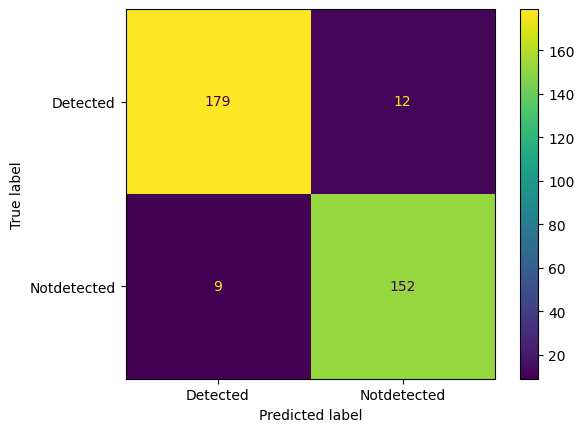

In [39]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['Detected','Notdetected'])
cm_disp.plot()

In [42]:
#with open('trainmodel.pkl','wb') as file:
    #pickle.dump(model,file)
print(X_test.shape)

(352, 11)
